# Imports

In [4]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pickle

# Data Loading

In [6]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
print(test.head())
print(test.shape)
print(train.head())
print(train.shape)

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
(300, 2)
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
(700, 2)


plot the data here

In [33]:
train.info()
test.info()
train=train.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


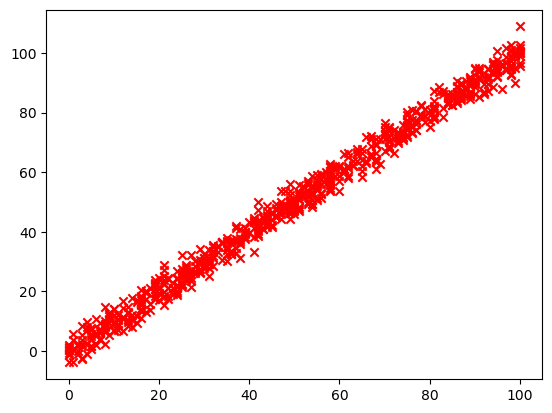

In [35]:
test_x=test.iloc[:,0].values
test_y=test.iloc[:,1].values
train_x=train.iloc[:,0].values
train_y=train.iloc[:,1].values
plt.scatter(train_x,train_y,c='red',marker='x')

# Data Preprocessing

## Standardize the data
    fill this
### Why Use Standardization in Machine Learning?
 fill this

### How to Standardize Data

    fill this

Standardization adjusts numerical features so they have a mean of 0 and a standard deviation of 1. This is done to make sure that algorithms perform better when all features are on a similar scale.
-> standardization avoids bias towards features with higher values
-> Helps Gradient Descent Converge Faster
-> It is required for distance based models to ensure all features contribute equally to the distance.
Standardization transforms a feature X using the formula:

## Reshaping data for the correct shape for the model

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x= train_x.reshape(-1,1)
train_y= train_y.reshape(-1,1)
test_x= test_x.reshape(-1,1)
test_y= test_x.reshape(-1,1)

train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

why cant we make the model without reshaping?

In Scikit learn's LinearRegression model, the input data must be a 2D array, but a simple NumPy array is 1D. This is why reshaping is required.If you try to fit a Linear Regression model with a 1D NumPy array, you’ll get an error.

# Model Implementation

w=[[28.95283303]], b=[49.93986917]


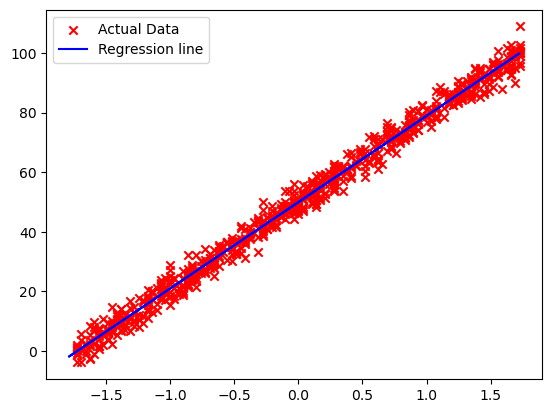

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)
plt.scatter(train_x,train_y,marker='x',c='red',label='Actual Data')
plt.plot(test_x,y_pred,c='blue',label='Regression line')
plt.legend()
print(f'w={lr.coef_}, b={lr.intercept_}')

# Linear Regression Model

Linear regression is a fundamental model in machine learning used for predicting a continuous output variable based on input features. The model function for linear regression is represented as:

$$f_{w,b}(x) = wx + b$$

In this equation, $f_{w,b}(x)$ represents the predicted output, $w$ is the weight parameter, $b$ is the bias parameter, and $x$ is the input feature.

## Model Training

To train a linear regression model, we aim to find the best values for the parameters $(w, b)$ that best fit our dataset.

### Forward Pass

The forward pass is a step where we compute the linear regression output for the input data $X$ using the current weights and biases. It's essentially applying our model to the input data.

### Cost Function

The cost function is used to measure how well our model is performing. It quantifies the difference between the predicted values and the actual values in our dataset. The cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Here, $J(w, b)$ is the cost, $m$ is the number of training examples, $x^{(i)}$ is the input data for the $i$-th example, $y^{(i)}$ is the actual output for the $i$-th example, and $w$ and $b$ are the weight and bias parameters, respectively.

### Backward Pass (Gradient Computation)

The backward pass computes the gradients of the cost function with respect to the weights and biases. These gradients are crucial for updating the model parameters during training. The gradient formulas are as follows:

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$

## Training Process

The training process involves iteratively updating the weights and biases to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the model learns to make better predictions and fit the data.


In [116]:
class LinearRegression:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def initialize_parameters(self,n_features):
        self.w = np.zeros((n_features, 1))
        self.b = 0
        
    def forward(self,X):
        return np.dot(X,self.w) + self.b

    def compute_cost(self,y_pred,y):
        m = y.shape[0]
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        return cost
        
    def backward(self,X,y,y_pred,learning_rate):
        m= X.shape[0]

        dw= (1/m) * np.dot(X.T,(y_pred-y))
        db= (1/m) * np.sum(y_pred -y)

        self.w= self.w - learning_rate * dw
        self.b= self.b - learning_rate * db

    def fit(self, X, y, iterations=1000,learning_rate=0.01, plot_cost=True):
        X= np.array(X)
        y= np.array(y).reshape(-1,1)
        n_features = X.shape[1]

        self.initialize_parameters(n_features)

        cost_history=[]

        for i in range(iterations):
            y_pred = self.forward(X)

            cost = self.compute_cost(y_pred, y)
            cost_history.append(cost)

            self.backward(X, y, y_pred, learning_rate)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")

        if plot_cost:
            import matplotlib.pyplot as plt
            plt.plot(range(iterations), cost_history, color='blue')
            plt.xlabel("Iterations")
            plt.ylabel("Cost (MSE)")
            plt.title("Cost Reduction Over Iterations")
            plt.show()
            
    def predict(self, X):
        X = np.array(X)
        return self.forward(X)
    
    def save_model(self, filename):
        with open(filename, "wb") as f:
            pickle.dump({"W": self.w, "b": self.b}, f)
        print(f"Model saved to {filename}")
    
    @classmethod
    def load_model(cls, filename):
        with open(filename, "rb") as f:
            params = pickle.load(f)

        model = cls()
        model.w = params["W"]
        model.b = params["b"]
        print(f"Model loaded from {filename}")
        return model

   

Iteration 0: Cost = 1670.0624130893364
Iteration 100: Cost = 227.1612359884087
Iteration 200: Cost = 33.84180542825591
Iteration 300: Cost = 7.940930978080237
Iteration 400: Cost = 4.470740240708801
Iteration 500: Cost = 4.005805214020656
Iteration 600: Cost = 3.9435133703148972
Iteration 700: Cost = 3.935167529348897
Iteration 800: Cost = 3.9340493562898575
Iteration 900: Cost = 3.933899543826972


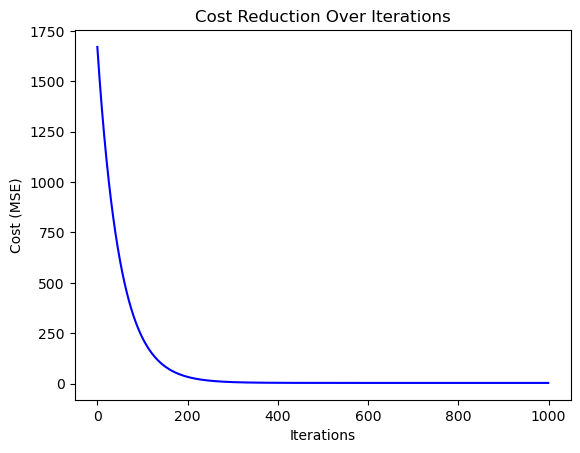

In [118]:
lr = LinearRegression()
lr.fit(train_x,train_y)

In [120]:
lr.save_model('model.pkl')

Model saved to model.pkl


# Evaluation



### 1. Mean Squared Error (MSE)

**Formula:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

**Description:**
 - fill this

**Interpretation:**
-  fill this

### 2. Root Mean Squared Error (RMSE)

**Formula:**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Description:**
- fill this
**Interpretation:**
- fill this


### 3. R-squared ($R^2$)

**Formula:**
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

**Description:**
 fill this 

**Interpretation:**
 fill this


1. Mean Squared Error (MSE)
   Description:
   MSE measures the average squared difference between actual values and the predicted values. It is sensitive to outliers.
   
   Interpretation: 
   ∙ A lower MSE indicates a better model with more accurate predictions.
   ∙ A higher MSE suggests poor model performance.
   
2. Root Mean Squared Error (RMSE)
   Description:
   RMSE is square root of MSE. It provides a more interpretable metric compared to MSE.

   Interpretation;
   ∙ A lower RMSE means better predictive accuracy.
   ∙ Like MSE, RMSE is sensitive to outliers due to the squared differences.

3. R-squared
   Description: R-squared compares the model’s performance with a baseline model that only uses the mean of the actual values.
   Interpretation:
   • R-squared ranges from 0 to 1.
   • R-squared = 1 means the model perfectly fits the data.
   • R-squared = 0 means the model does no better than simply predicting the mean of the target variable.
               


In [74]:
class RegressionMetrics:
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        """
        Calculate the Mean Squared Error (MSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Mean Squared Error.
        """
        return np.mean((y_true - y_pred) ** 2)
        
    @staticmethod
    def root_mean_squared_error(y_true, y_pred):
        """
        Calculate the Root Mean Squared Error (RMSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Root Mean Squared Error.
        """
        return np.sqrt(RegressionMetrics.mean_squared_error(y_true, y_pred))
        
    @staticmethod
    def r_squared(y_true, y_pred):
        ssm = np.sum((y_true - np.mean(y_true)) ** 2)
        ssr = np.sum((y_true - y_pred) ** 2)
        return (1 - (ssr / ssm))
        

In [76]:
y_pred = lr.predict(test_x)
mse_value = RegressionMetrics.mean_squared_error(test_y, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(test_y, y_pred)
r_squared_value = RegressionMetrics.r_squared(test_y, y_pred)

print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"R-squared (Coefficient of Determination): {r_squared_value}")

Mean Squared Error (MSE): 1.2397146368803096
Root Mean Squared Error (RMSE): 1.1134247333701142
R-squared (Coefficient of Determination): 0.9984690836172884
